In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [260]:
df = pd.read_csv('../bubble chart/not_present_in_strain.csv')
df

,Names,Pathway(s),Unnamed: 2,Important Notes,Source
0,gluconeogenesis,Glycolysis Gluconeogenesis,NaN,NaN,NaN
1,NAD(P)H-quinone oxidoreductase,Ubiquinone and other terpenoid-quinone biosynt...,NaN,NaN,NaN
2,Na-NADH-ubiquinone oxidoreductase,unknown,NaN,NaN,NaN
3,V-type ATPase,Oxidative phosphorylation\nPhotosynthesis\nMet...,NaN,NaN,NaN
4,Cytochrome c oxidase,Oxidative phosphorylation,NaN,NaN,NaN
...,...,...,...,...,...
111,end-product nostoxanthin,Carotenoid biosynthesis,NaN,NaN,NaN
112,end-product zeaxanthin diglucoside,Biosynthesis of secondary metabolites,NaN,NaN,NaN
113,end-product myxoxanthophylls,Carotenoid biosynthesis,NaN,NaN,NaN
114,staphyloaxanthin biosynthesis,Carotenoid biosynthesis\nBiosynthesis of secon...,NaN,NaN,NaN


In [261]:
df['Pathway(s)']

0                            Glycolysis  Gluconeogenesis
1      Ubiquinone and other terpenoid-quinone biosynt...
2                                                unknown
3      Oxidative phosphorylation\nPhotosynthesis\nMet...
4                              Oxidative phosphorylation
                             ...                        
111                              Carotenoid biosynthesis
112                Biosynthesis of secondary metabolites
113                              Carotenoid biosynthesis
114    Carotenoid biosynthesis\nBiosynthesis of secon...
115                      Terpenoid backbone biosynthesis
Name: Pathway(s), Length: 116, dtype: object

In [262]:
#cleaning up column to make it into a list
pathway_class = df['Pathway(s)'].tolist()
str_path =[]
for x in pathway_class:
    str_path.append(str(x))

clean_path = []
for path in str_path:
    path = path.replace('\t', '').split('\n')
    clean_path.append(path)

clean = sum(clean_path, [])
clean


['Glycolysis  Gluconeogenesis',
 'Ubiquinone and other terpenoid-quinone biosynthesis',
 'Metabolic pathways',
 'Biosynthesis of secondary metabolites',
 'unknown',
 'Oxidative phosphorylation',
 'Photosynthesis',
 'Metabolic pathways',
 'Oxidative phosphorylation',
 'Oxidative phosphorylation',
 'Metabolic pathways',
 'Oxidative phosphorylation',
 'Metabolic pathways',
 'Oxidative phosphorylation',
 'Metabolic pathways',
 'Oxidative phosphorylation',
 'Metabolic pathways',
 'Oxidative phosphorylation',
 'Metabolic pathways',
 'Two-component system',
 'Oxidative phosphorylation',
 'Metabolic pathways',
 'Two-component system',
 'Glyoxylate and dicarboxylate metabolism',
 'Carbon fixation in photosynthetic organisms',
 'Metabolic pathways',
 'Biosynthesis of secondary metabolites',
 'Microbial metabolism in diverse environments',
 'Glyoxylate and dicarboxylate metabolism',
 'Carbon fixation in photosynthetic organisms',
 'Metabolic pathways',
 'Biosynthesis of secondary metabolites',
 '

In [263]:
df_class = pd.DataFrame (clean, columns = ['Class'])
df_class

,Class
0,Glycolysis Gluconeogenesis
1,Ubiquinone and other terpenoid-quinone biosynt...
2,Metabolic pathways
3,Biosynthesis of secondary metabolites
4,unknown
...,...
288,Biosynthesis of secondary metabolites
289,Carotenoid biosynthesis
290,Carotenoid biosynthesis
291,Biosynthesis of secondary metabolites


In [264]:
df_class = df_class.replace({'': 'unknown'})
df_class

,Class
0,Glycolysis Gluconeogenesis
1,Ubiquinone and other terpenoid-quinone biosynt...
2,Metabolic pathways
3,Biosynthesis of secondary metabolites
4,unknown
...,...
288,Biosynthesis of secondary metabolites
289,Carotenoid biosynthesis
290,Carotenoid biosynthesis
291,Biosynthesis of secondary metabolites


In [265]:
""" df_class = df_class.replace({'','Unknown'})
df_class """

" df_class = df_class.replace({'','Unknown'})\ndf_class "

In [266]:
df2 = df_class.sort_values('Class')
df2_group = df2['Class'].value_counts() #grouping each class and counting it
df2_group.to_excel('not_present_groups.xlsx')


In [267]:
df2_group = df2_group.reset_index()
df2_group.columns = ['Class', 'Count']
df2_group.to_excel('ahhh.xlsx')

In [270]:
df2_group

,Class,Count
0,Metabolic pathways,53
1,Microbial metabolism in diverse environments,29
2,unknown,24
3,Sulfur metabolism,15
4,Methane metabolism,15
...,...,...
79,Biofilm formation - Escherichia coli,1
80,Monobactam biosynthesis,1
81,Naphthalene degradation,1
82,Butanoate metabolism,1


/var/folders/6q/gd8tcb5j5xn3r9z_p95j86380000gn/T/ipykernel_8631/72436731.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=12)


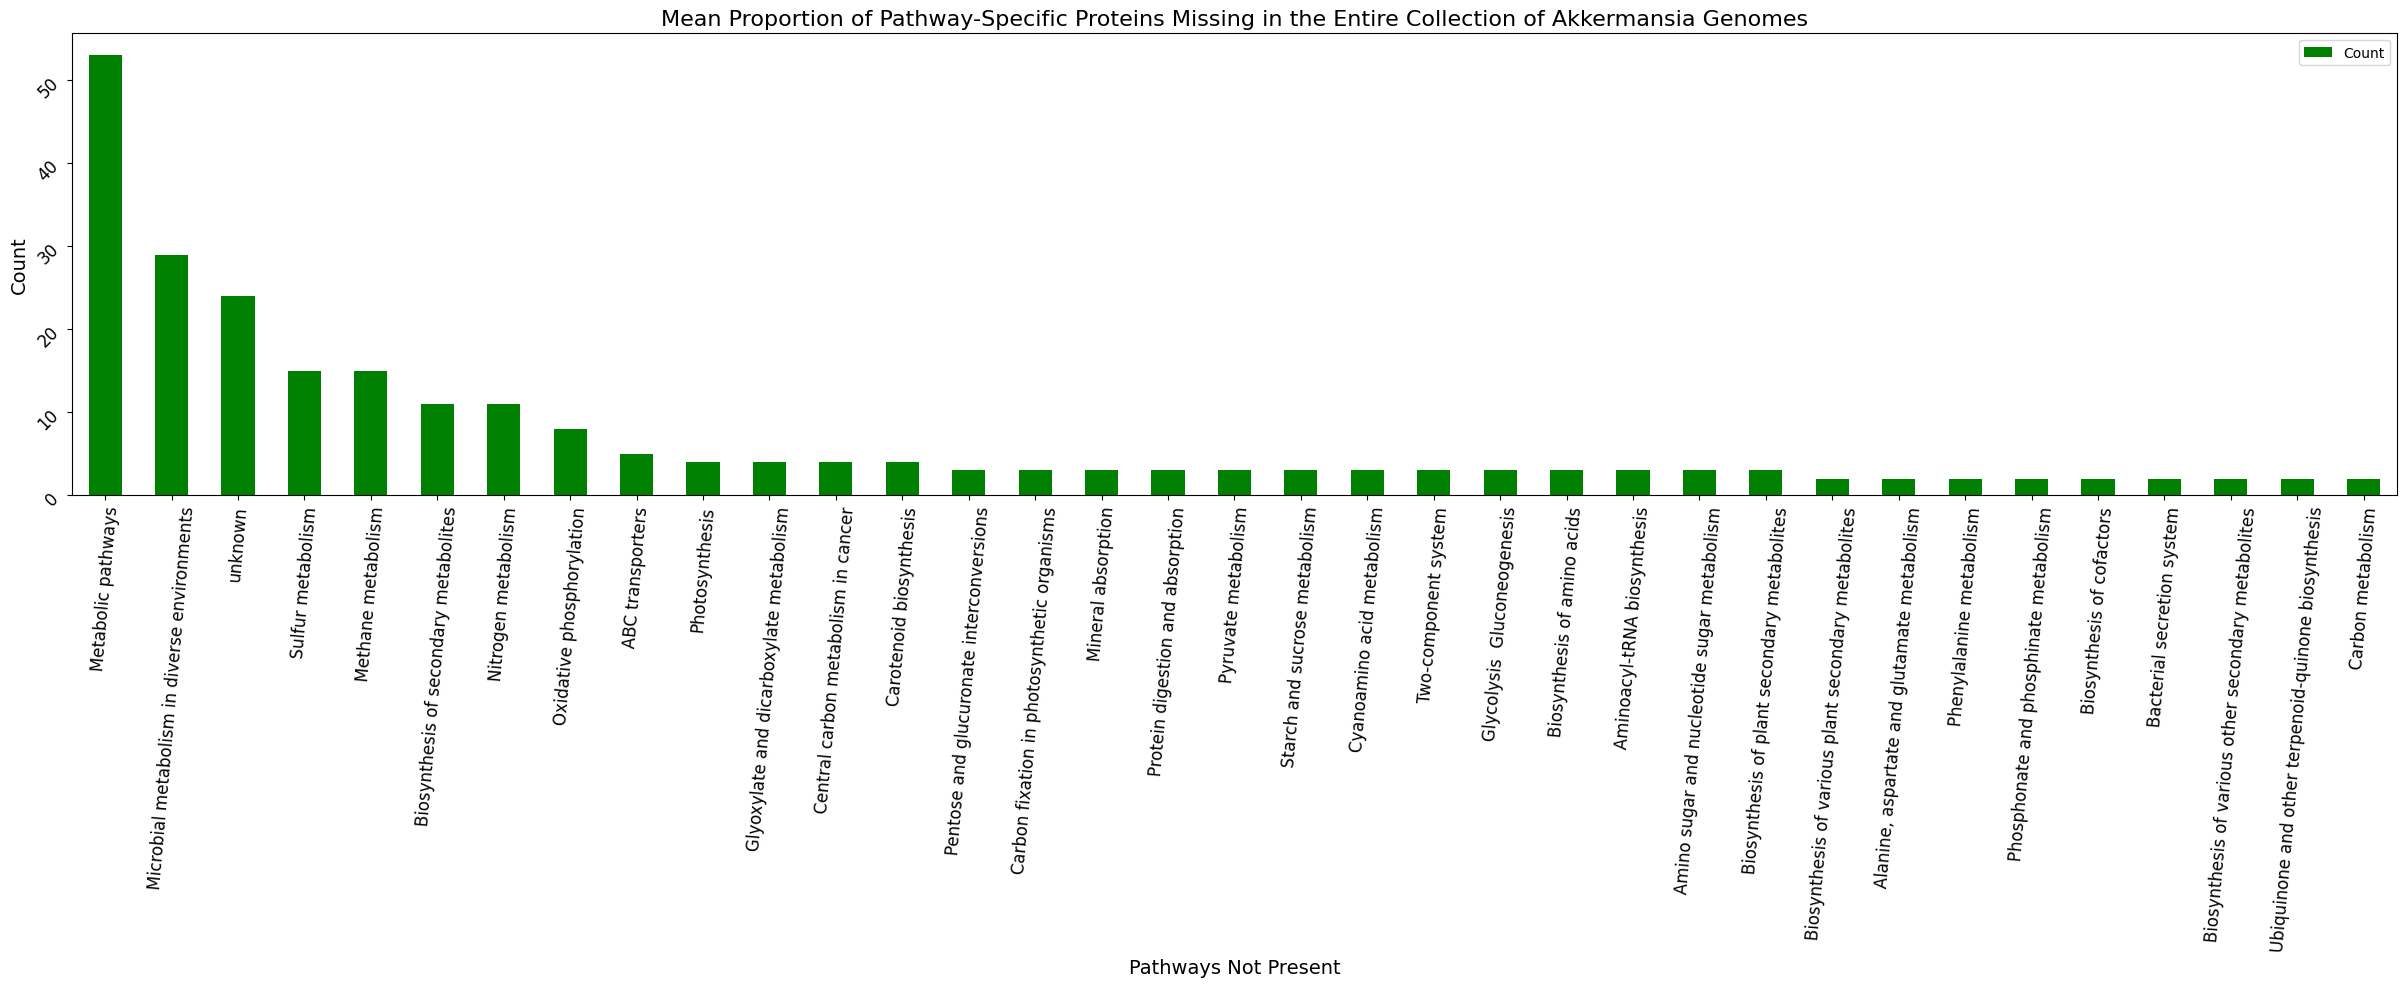

In [275]:
#setting index as class
data = df2_group.set_index(['Class'])

data_filtered = data[data['Count'] > 1]



#plotting 
fig, ax = plt.subplots(figsize=(30, 6))
data_filtered.plot(kind='bar', ax=ax, color ='g')

plt.xlabel('Pathways Not Present', fontsize=14)  # Set x-axis title and font size
plt.ylabel('Count', fontsize=14)  # Set y-axis title and font size
plt.title('Mean Proportion of Pathway-Specific Proteins Missing in the Entire Collection of Akkermansia Genomes', fontsize=16)  # Set title and font size

# Tilt the y-axis labels and set font size
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=12)

# Increase rotation angle for x-axis tick labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, fontsize=12)

plt.show()